# Riconoscitore e risolutore di espressioni matematiche scritte a mano 2/3

![Logo Sapienza](logo.png "Logo Sapienza")

Frasca Emanuele - 1836098

# Caricamento delle librerie

Carichiamo le librerie che utilizzeremo nel progetto tra cui Numpy, Pandas, Matplotlib, OpenCV2, Sympy e Tensorflow.

In [1]:
print("Sto per caricare le librerie necessarie...")

print("Sto per caricare Numpy, Pandas e Matplotlib...")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

print("Sto per caricare os...")
import os
from os import listdir
from os.path import isfile, join


print("Sto per caricare PIL e OpenCV...")
import cv2
from PIL import Image


print("Sto per caricare Tensorflow e Keras...")
import tensorflow
from tensorflow import keras
from keras import optimizers
from keras import backend as K
from keras.models import Model, Sequential, load_model
from keras.layers import *
from keras.layers import Input, Dense, Dropout, Flatten
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
K.image_data_format()

from sklearn.model_selection import GridSearchCV
import numpy as np
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import GridSearchCV, KFold

print("Fatto")

Sto per caricare le librerie necessarie...
Sto per caricare Numpy, Pandas e Matplotlib...
Sto per caricare os...
Sto per caricare PIL e OpenCV...
Sto per caricare Tensorflow e Keras...
Fatto


# Funzione alternativa

In [2]:
def load_dataset(file):
    
    # Utilizziamo Pandas per caricare un file csv da disco
    dataframe = pd.read_csv(file, index_col = False)
    # Inseriamo le etichette in una variabile "labels"
    labels = dataframe[['1024']]
    # Eliminiamo dalla tabella originale la colonna contenente le etichette
    dataframe.drop(dataframe.columns[[1024]], axis = 1, inplace = True)
    
    # Traforiamo le'array di etichette in un np_array
    labels = np.array(labels)
    # Utilizziamo una one-hot encoding per codificarle
    Y = to_categorical(labels, num_classes = 24)

    # Trasformo il dataframe in un array di Numpy
    dataframe_numpy = dataframe.to_numpy()
    # Effettuo un reshape per riportare in forma matrciale le immagini
    X = dataframe_numpy.reshape(dataframe_numpy.shape[0], 32, 32, 1)
    
    return X, Y

In [3]:
X_train, Y_train = load_dataset("train.csv")
X_test, Y_test = load_dataset("test.csv")

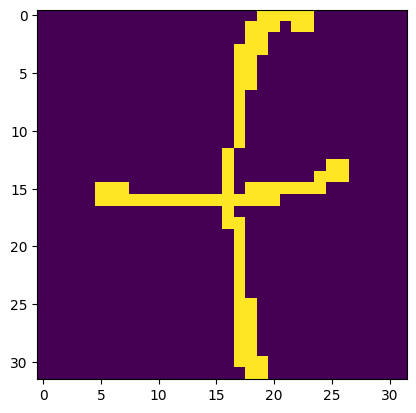

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [62]:
#pos 456 simbolo !
imgplot = plt.imshow(X_train[4563])



plt.show()
print(Y_train[456])

# Caricamento set di training

Trasformo l'array di training in un dataframe di Pandas, poi estraggo le label contenute nell'ultima colonna.

In [7]:
# Carico il training-set dal file csv precedentemente
train_dataframe = pd.read_csv('train.csv',index_col=False)
train_labels = train_dataframe[['784']]

train_dataframe.drop(train_dataframe.columns[[784]],axis=1,inplace=True)
train_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Utilizzo una one-hot encoding per le label per poter essere successivamente comprese dal modello.

In [9]:
#np.random.seed(1212)
train_labels = np.array(train_labels)
Y_train = to_categorical(train_labels, num_classes=25)
print("Stampo una etichetta")
print(Y_train[0])

Stampo una etichetta
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0.]


Riporto il dataframe in forma matriciale di numpy.

In [10]:
train_numpy = train_dataframe.to_numpy()
X_train = train_numpy.reshape(train_numpy.shape[0], 28, 28, 1)
X_train.shape

(7200, 28, 28, 1)

# Caricamento set di test

Trasformo l'array di test un un dataframe di Pandas, poi estraggo le label contenute nell'ultima colonna.

In [11]:
test_dataframe = pd.read_csv('test.csv', index_col=False)
test_labels = test_dataframe[['784']]

test_dataframe.drop(test_dataframe.columns[[784]], axis=1, inplace=True)
test_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Categorizzo le label per poter essere successivamente comprese dal modello.

In [12]:
#np.random.seed(1212)
test_labels = np.array(test_labels)
Y_test = to_categorical(test_labels, num_classes=25)


Riporto il dataframe in forma matriciale di numpy e ne effettuo un reshape.

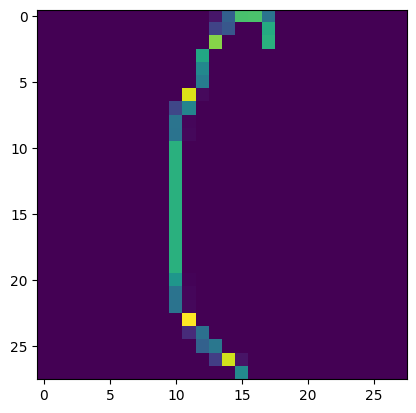

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0.]


In [14]:
test_numpy = test_dataframe.to_numpy()
X_test = test_numpy.reshape(test_numpy.shape[0], 28, 28, 1)
X_test.shape

imgplot = plt.imshow(X_test[456])
plt.show()
print(Y_test[345])

# Definizione e training del modello

Definisco il modello sequenziale che successivamente alleneremo, poi ne stampo un sommario.

In [4]:
def make_model(n_neurons=128, epoch=10):
    model = Sequential(name="Modello")
    model.add(Conv2D(32, (3,3), input_shape=(32, 32, 1), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(n_neurons, activation='relu'))
    model.add(Dense(24, activation='softmax'))

    model.compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy']
    )

    return model

In [39]:
def make_model2(n_neurons=128, dropout_rate=0.2, l2_reg=0.001):
    model = Sequential(name="Modello")
    model.add(Conv2D(32, (3,3), input_shape=(32, 32, 1), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    model.add(Flatten())
    model.add(Dense(n_neurons, activation='relu', kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(24, activation='softmax'))

    model.compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy']
    )

    return model


In [5]:
%pip install keras-applications



  Using cached Keras_Applications-1.0.8-py3-none-any.whl (50 kB)


In [15]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model

def make_model_res(n_neurons=128, epoch=10):
    base_model = ResNet50(include_top=False, input_shape=(28, 28, 1))

    # Aggiungi un layer di GlobalAveragePooling per ridurre il numero di parametri e migliorare la generalizzazione
    x = base_model.output
    x = GlobalAveragePooling2D()(x)

    # Aggiungi uno o più layer densi per adattare il modello ai propri dati di training
    x = Dense(n_neurons, activation='relu')(x)
    predictions = Dense(25, activation='softmax')(x)

    # Unisci il modello base con il nuovo layer di output
    model = Model(inputs=base_model.input, outputs=predictions)

    # Congela i pesi del modello base per evitare che vengano modificati durante il training del nuovo layer di output
    for layer in base_model.layers:
        layer.trainable = False

    model.compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy']
    )

    return model


In [21]:
demo_resnet_model = Sequential()

pretrained_model_for_demo= tensorflow.keras.applications.ResNet50(include_top=False,

                   input_shape=(32,32, 3),

                   pooling='avg',classes=5,

                   weights='imagenet')

In [4]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, BatchNormalization, Activation, Concatenate, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model

def make_densenet(n_blocks=3, n_filters=12, reduction=0.5, classes=25):
    def dense_block(x, blocks, n_filters):
        for i in range(blocks):
            x = conv_block(x, n_filters)
        return x

    def transition_block(x, reduction):
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Conv2D(int(x.shape[-1] * reduction), (1, 1), padding='same', use_bias=False)(x)
        x = AveragePooling2D((2, 2), strides=(2, 2))(x)
        return x

    def conv_block(x, n_filters):
        x1 = BatchNormalization()(x)
        x1 = Activation('relu')(x1)
        x1 = Conv2D(n_filters, (3, 3), padding='same', use_bias=False)(x1)
        x = Concatenate()([x, x1])
        return x

    input_shape = (28, 28, 1)
    inputs = Input(shape=input_shape)
    x = Conv2D(n_filters, (3, 3), padding='same', use_bias=False)(inputs)

    for i in range(n_blocks - 1):
        x = dense_block(x, 3, n_filters)
        x = transition_block(x, reduction)

    x = dense_block(x, 3, n_filters)

    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = GlobalAveragePooling2D()(x)

    outputs = Dense(classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs, name="Densenet")

    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    return model


In [5]:
# definizione dei parametri della grid search
param_grid = {
    'n_neurons': [128,256],
    'epochs': [2,4,6],
    'batch_size':[32,64]
}

# creazione del modello da utilizzare con KerasClassifier
model = KerasClassifier(build_fn=make_model, epochs=10, batch_size=32, verbose=5)

# definizione della cross-validation con k-fold
kfold = KFold(n_splits=2, shuffle=True, random_state=42)

# esecuzione della grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, verbose=5)
grid_result = grid.fit(X_train, Y_train)

# stampa dei risultati
print("Miglior modello: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

C:\Users\Emanuele\AppData\Local\Temp\ipykernel_11352\2695337891.py:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=make_model, epochs=10, batch_size=32, verbose=5)


Fitting 2 folds for each of 12 candidates, totalling 24 fits
Epoch 1/2
Epoch 2/2
[CV 1/2] END batch_size=32, epochs=2, n_neurons=128;, score=0.932 total time=  26.9s
Epoch 1/2
Epoch 2/2
[CV 2/2] END batch_size=32, epochs=2, n_neurons=128;, score=0.935 total time=  26.3s
Epoch 1/2
Epoch 2/2
[CV 1/2] END batch_size=32, epochs=2, n_neurons=256;, score=0.935 total time=  26.8s
Epoch 1/2
Epoch 2/2
[CV 2/2] END batch_size=32, epochs=2, n_neurons=256;, score=0.940 total time=  27.0s
Epoch 1/4
Epoch 2/4
Epoch 3/4
Epoch 4/4
[CV 1/2] END batch_size=32, epochs=4, n_neurons=128;, score=0.958 total time=  46.9s
Epoch 1/4
Epoch 2/4
Epoch 3/4
Epoch 4/4
[CV 2/2] END batch_size=32, epochs=4, n_neurons=128;, score=0.954 total time=  47.4s
Epoch 1/4
Epoch 2/4
Epoch 3/4
Epoch 4/4
[CV 1/2] END batch_size=32, epochs=4, n_neurons=256;, score=0.951 total time=  48.5s
Epoch 1/4
Epoch 2/4
Epoch 3/4
Epoch 4/4
[CV 2/2] END batch_size=32, epochs=4, n_neurons=256;, score=0.945 total time=  49.7s
Epoch 1/6
Epoch 2/6

In [22]:
# definizione dei parametri della grid search
param_grid_2 = {
    'n_neurons': [128],
    'epochs': [10],
    'batch_size':[32]
}

# creazione del modello da utilizzare con KerasClassifier
model = KerasClassifier(build_fn=make_model, epochs=10, batch_size=32, verbose=5)

# definizione della cross-validation con k-fold
kfold = KFold(n_splits=2, shuffle=True, random_state=42)

# esecuzione della grid search
grid_2 = GridSearchCV(estimator=model, param_grid=param_grid_2, cv=kfold, verbose=5)
grid_result_2 = grid_2.fit(X_train, Y_train)

# stampa dei risultati
print("Miglior modello: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

C:\Users\Emanuele\AppData\Local\Temp\ipykernel_11352\22357956.py:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=make_model, epochs=10, batch_size=32, verbose=5)


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV 1/2] END batch_size=32, epochs=10, n_neurons=128;, score=0.961 total time= 2.0min
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV 2/2] END batch_size=32, epochs=10, n_neurons=128;, score=0.954 total time= 1.9min
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
Miglior modello: 0.955745 using {'batch_size': 32, 'epochs': 4, 'n_neurons': 128}


In [6]:
print("Miglior modello: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Miglior modello: 0.955745 using {'batch_size': 32, 'epochs': 4, 'n_neurons': 128}


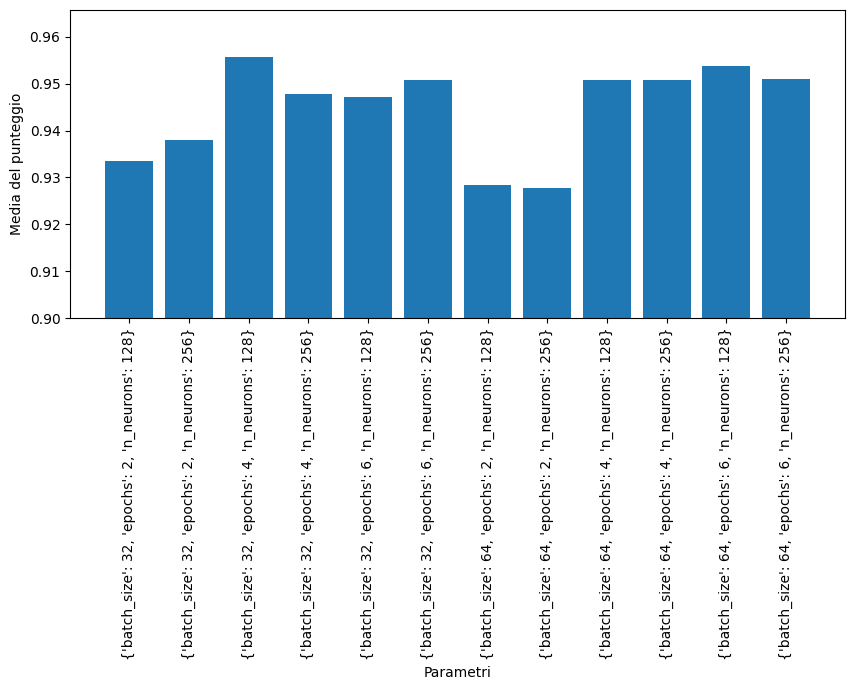

In [18]:
results = grid.cv_results_
mean_scores = np.array(results['mean_test_score'])
params = results['params']
    
# Estrai i valori di ogni parametro dalla lista dei parametri
param_values = [str(p) for p in params]

plt.figure(figsize=(10,4))
plt.gca().set_ylim([0.9, max(mean_scores)+0.01])


# Crea il grafico a barre
plt.bar(param_values, mean_scores)
plt.xticks(rotation=90)
plt.xlabel('Parametri')
plt.ylabel('Media del punteggio')
plt.show()

In [9]:
import pickle

with open('grid_result.pickle', 'wb') as file:
    pickle.dump(grid_result, file)

In [ ]:
with open('nome_file.pickle', 'rb') as file:
    loaded_variable = pickle.load(file)

print(loaded_variable) # Output: Hello World!

In [19]:
make_model(n_neurons=128, epoch=15).summary()

Model: "Modello"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 14, 14, 15)        4335      
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 7, 7, 15)         0         
 g2D)                                                            
                                                                 
 flatten_25 (Flatten)        (None, 735)               0         
                                                                 
 dense_50 (Dense)            (None, 128)               9420

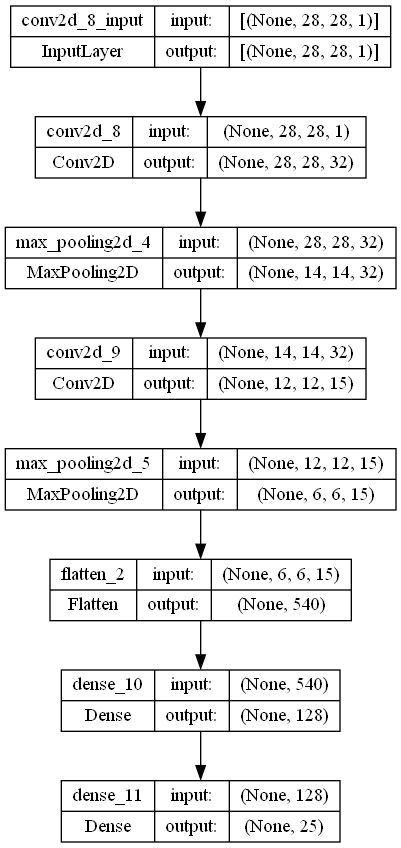

In [59]:
plot_model(make_model(n_neurons=128, epoch=15), to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [8]:
pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

,batch_size,epochs,n_neurons,Accuracy
0,32,2,128,0.933541
1,32,2,256,0.937970
2,32,4,128,0.955745
3,32,4,256,0.947743
4,32,6,128,0.947224
5,32,6,256,0.950828
6,64,2,128,0.928288
7,64,2,256,0.927830
8,64,4,128,0.950889
9,64,4,256,0.950767


In [20]:
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.955745 using {'batch_size': 32, 'epochs': 4, 'n_neurons': 128}
0.933541 (0.001955) with: {'batch_size': 32, 'epochs': 2, 'n_neurons': 128}
0.937970 (0.002474) with: {'batch_size': 32, 'epochs': 2, 'n_neurons': 256}
0.955745 (0.001985) with: {'batch_size': 32, 'epochs': 4, 'n_neurons': 128}
0.947743 (0.003024) with: {'batch_size': 32, 'epochs': 4, 'n_neurons': 256}
0.947224 (0.002504) with: {'batch_size': 32, 'epochs': 6, 'n_neurons': 128}
0.950828 (0.002993) with: {'batch_size': 32, 'epochs': 6, 'n_neurons': 256}
0.928288 (0.001222) with: {'batch_size': 64, 'epochs': 2, 'n_neurons': 128}
0.927830 (0.005467) with: {'batch_size': 64, 'epochs': 2, 'n_neurons': 256}
0.950889 (0.000611) with: {'batch_size': 64, 'epochs': 4, 'n_neurons': 128}
0.950767 (0.002749) with: {'batch_size': 64, 'epochs': 4, 'n_neurons': 256}
0.953790 (0.001435) with: {'batch_size': 64, 'epochs': 6, 'n_neurons': 128}
0.951011 (0.000367) with: {'batch_size': 64, 'epochs': 6, 'n_neurons': 256}


In [23]:
model = make_model(n_neurons=128, epoch=15)

In [5]:
model = make_densenet()

In [40]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from keras.regularizers import l2


model = make_model2()

In [16]:
model = make_model_res()

ValueError: The input must have 3 channels; Received `input_shape=(28, 28, 1)`

In [9]:
model = ResNet50(weights='imagenet', include_top=False)


94765736/94765736 [==============================] - 73s 1us/step


In [24]:
history = model.fit(X_train, Y_train, epochs=4) #2 epoche, 97,05&

Epoch 1/4
1024/1024 [==============================] - 24s 22ms/step - loss: 0.7892 - accuracy: 0.8425
Epoch 2/4
1024/1024 [==============================] - 23s 22ms/step - loss: 0.1303 - accuracy: 0.9613
Epoch 3/4
1024/1024 [==============================] - 23s 23ms/step - loss: 0.0759 - accuracy: 0.9766
Epoch 4/4
1024/1024 [==============================] - 23s 23ms/step - loss: 0.0645 - accuracy: 0.9795


Compiliamo e alleniamo il nostro modello, successivamente lo salviamo nel file "modello.h5" (modello contenuto nella repository allenato con impostazioni differenti).

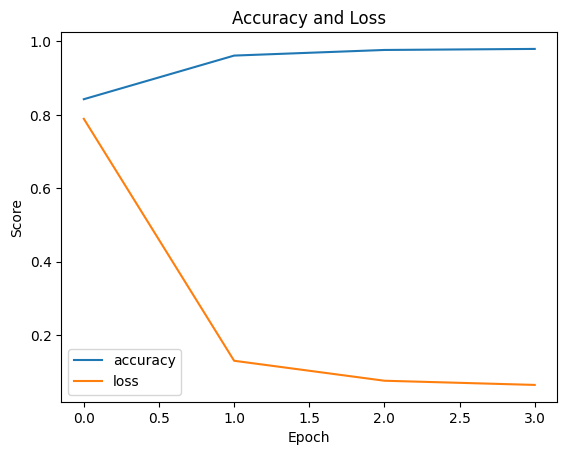

In [25]:
import matplotlib.pyplot as plt

# Estrai i dati di training dall'oggetto history
acc = history.history['accuracy']
loss = history.history['loss']

# Crea il grafico
fig, ax = plt.subplots()
ax.plot(acc, label='accuracy')
ax.plot(loss, label='loss')
ax.set_title('Accuracy and Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Score')
ax.legend()

# Mostra il grafico
plt.show()

Valutiamo la qualità del modello sul test-set.

In [28]:
# Valutiamo la validità del nostro modello sui dati di test
results = model.evaluate(X_test, Y_test)
# Stampiamo a video i valori
print(f"test loss: {results[0]}")
print(f"test accuracy: {results[1]}")

333/333 [==============================] - 3s 9ms/step - loss: 0.1721 - accuracy: 0.9545
test loss: 0.17209301888942719
test accuracy: 0.9544515609741211


Salviamo il modello.

In [32]:
model.save('modello.h5')

In [5]:
model = load_model("modello.h5")

Effettuiamo un plotting dei risultati ottenuti.

In [27]:
Y_prediction = model.predict(X_test)

333/333 [==============================] - 3s 9ms/step


In [30]:
import os
diz = {}
folders = [folder for folder in os.listdir("training")]
for folder,i in enumerate(folders):
    diz[i] = folder
labels = [key for key in diz]
print(labels)

['!', '(', ')', '+', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'cos', 'div', 'eq', 'mul', 'sin', 'y', 'z', '[', ']']


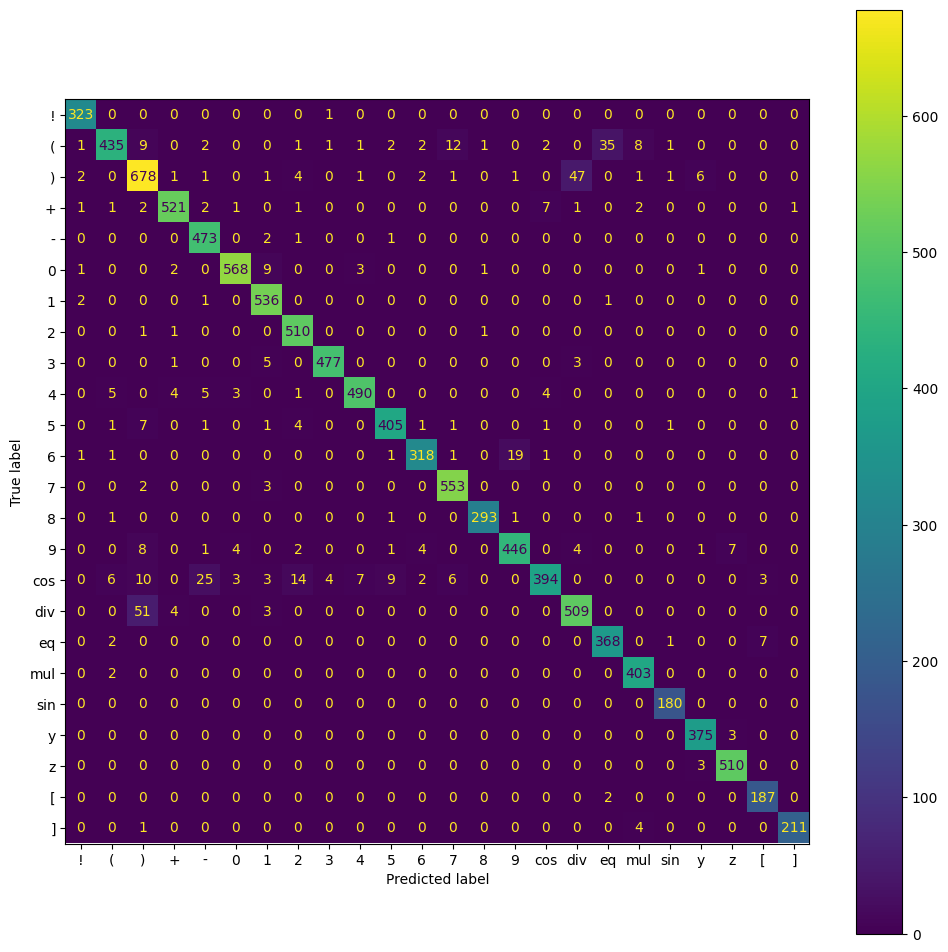

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

confusion_matrix = metrics.confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(Y_prediction, axis=1))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = labels)

# creazione di una nuova figura e specifica delle dimensioni desiderate
fig, ax = plt.subplots(figsize=(12, 12))

# creazione del grafico della matrice di confusione nella nuova figura
cm_display.plot(ax=ax)

plt.show()
